<a href="https://colab.research.google.com/github/Madukaife/pytorch-linear-regression/blob/main/ML_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project overview:
##1. get data and turn it into Tensors
##2. build a model (loss function & optimizer, training loop)
##3. Fit model
##4. Evaluate/Train Model
#5. Improve model via Epochs
##6. save and load trianed model


In [ ]:
#import PyTorch and other dependencies
import torch
from torch import nn
import matplotlib.pyplot as plt

#confirming PyTorch version
torch. __version__

'2.3.0+cu121'

In [ ]:
#setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print (f" the device is using: {device}")


 the device is using: cpu


In [ ]:
#creating a dummy dataset
#linear regression formula will be used: Y(label/output) = weight * X(feature/input) + bias
# y = mx + c   linear equation formular

weight = 0.7
bias = 0.3

#create range values
start = 0
end  = 1
step = 0.02

#creating x and y
x = torch.arange(start, end, step).unsqueeze(dim =1) #withouth unsqueeze, errors will pop up
y = weight * x + bias
x[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#splitting the data
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]
len(x_train), len(y_train), len(x_test), len(y_test)


(40, 40, 10, 10)

In [ ]:
#plotting the data

#plot prediction function
def plot_predictions(train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels =y_test,
                     predictions = None):
  """plots training data, test data and compare predictions."""
  plt.figure(figsize = (10, 7))

#plot traing data in blue
  plt.scatter(train_data, train_labels, c ="b", s=4, label = "Training data")

#plot test data in red
  plt.scatter(test_data, test_labels, c="r", s =4, label ="Testing data")

#confirm if there is predictions
  if predictions is not None:
   plt.scatter(test_data, predictions, c = "y", s =4, label = "predictions")

#show the legend
#plt.legend(prop = {"size": 14});


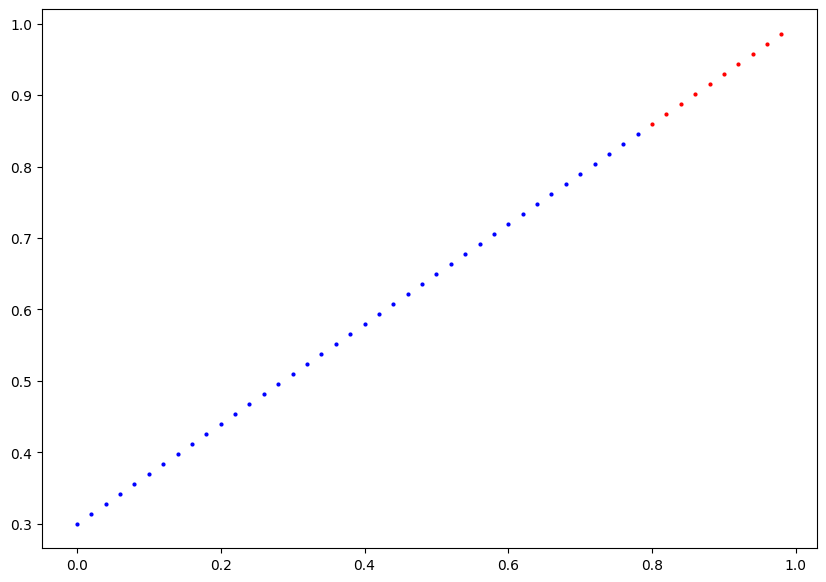

In [ ]:
#plot the data
plot_predictions(x_train, y_train, x_test, y_test)


In [ ]:
# #creating a linear regression model class manually
# # building a linear model by subclassing nn.module with nn.parameter
# class LinearRegressionModel(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.weights = nn.Parameter(torch.randn(1,
#                                             requires_grad = True,
#                                             dtype = torch.float))

#     self.bias = nn.Parameter(torch.randn(1,
#                                             requires_grad = True,
#                                             dtype = torch.float))

#     #forward method to define the computation in the model
#   def forward(self, x: torch.Tensor)-> torch.Tensor:
#       return self.weights * x + self.bias

# #set the manual_seed
# torch.manual_seed(42)
# model_1 = LinearRegressionModel()
# model_1, model_1.state_dict()


In [ ]:
##creating a linear regression model class using nn.module
# building a linear model by subclassing nn.module with nn.linear
class LinearRegressionModelV1(nn.Module):
  def __init__ (self):
    super().__init__()
    #use nn.Linear() to creat the model parameters just like the linear regreeion class created above
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features = 1)

    #forward method to define the computation in the model
  def forward(self, x: torch.Tensor)-> torch.Tensor:
      return self.linear_layer(x)

      #set the manual_seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV1()
model_1, model_1.state_dict()

(LinearRegressionModelV1(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# #check model current device
# next(model_1.parameters()).device

In [ ]:
#To set our model to use GPU,
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
#Training the Model
#we need: 1. loss function, 2. optimizer, 3. training loop, 4. Testing loop

#Loss FUnction
loss_fn = nn.L1Loss()  # same as MAE

#Optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

#training loop
torch.manual_seed(42)

epochs = 200


#write device agnostic code for data
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

#i. Forward pass
  y_pred = model_1(x_train)

#ii. calculate the loss
  loss = loss_fn(y_pred, y_train)

#iii. zero the optimizer
  optimizer.zero_grad()

#iv. perform back propagation
  loss.backward()

#v. optimizer step
  optimizer.step()



#Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(x_test)

    test_loss = loss_fn(test_pred, y_test)


  if epoch % 10 == 0:
    print (f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")



Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
#making and evaluating predictions

#turn model into evaluation mode
model_1.eval()

#make predictions on the test data

with torch.inference_mode():
  y_preds = model_1(x_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

In [ ]:
y_pred_cpu = test_pred.cpu().numpy()

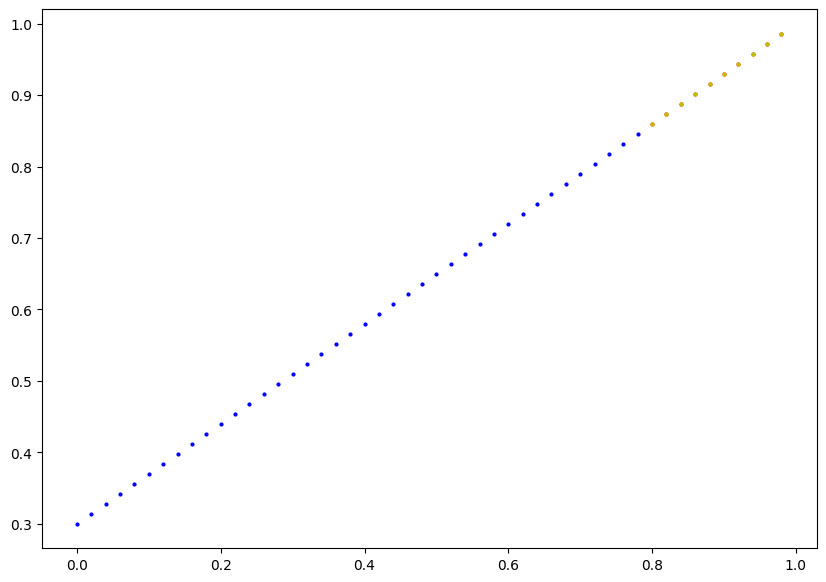

In [ ]:
#visualizing our predictions
plot_predictions(predictions = y_preds)

In [ ]:
#Saving and Loading Model

from pathlib import Path
# creat model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)


#create a model save path
MODEL_NAME = "Pytorch_ML_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#Save model state dict

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/Pytorch_ML_1.pth


In [26]:
#Loading a pytorch model

#create new instance
loaded_model_1 = LinearRegressionModelV1()

#load the model
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


#Put the loaded model to device
loaded_model_1.to(device)


LinearRegressionModelV1(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [27]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [28]:
loaded_model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [30]:
#evalute loaded model

loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(x_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])